In [21]:
pip install tensorflow scikit-learn pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflow (from versions: none)
ERROR: No matching distribution found for tensorflow


In [2]:
import pandas as pd
import seaborn as sns  
import matplotlib.pyplot as plt 
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.ensemble import IsolationForest

In [ ]:
chemin_fichier = r"C:\Users\hp\Desktop\PFE UM6P\Data\Paramètres Diagnostique_Globale.xlsx"
nom_feuille = "Pression d’air au réservoir542"
df = pd.read_excel(chemin_fichier, sheet_name=nom_feuille)

In [6]:
df.head()

Engin                 Paramètres Diagnostic  Code               Heure  \
0  994 F2  CH994.P2.Pression d’air au réservoir   542 2025-01-20 10:32:04   
1  994 F2  CH994.P2.Pression d’air au réservoir   542 2025-01-20 10:30:04   
2  994 F2  CH994.P2.Pression d’air au réservoir   542 2025-01-20 10:28:03   
3  994 F2  CH994.P2.Pression d’air au réservoir   542 2025-01-20 10:26:03   
4  994 F2  CH994.P2.Pression d’air au réservoir   542 2025-01-20 10:24:03   

   Valeur minimale  Valeur moyenne  Valeur maximale Unité de mesure  \
0              947             965             1001             kPa   
1              938             940              947             kPa   
2              938             945              950             kPa   
3              950             958              962             kPa   
4              962             975              979             kPa   

  Fonctionnement du capteur  
0                       Oui  
1                       Oui  
2                       Oui  
3                       Oui  
4                       Oui

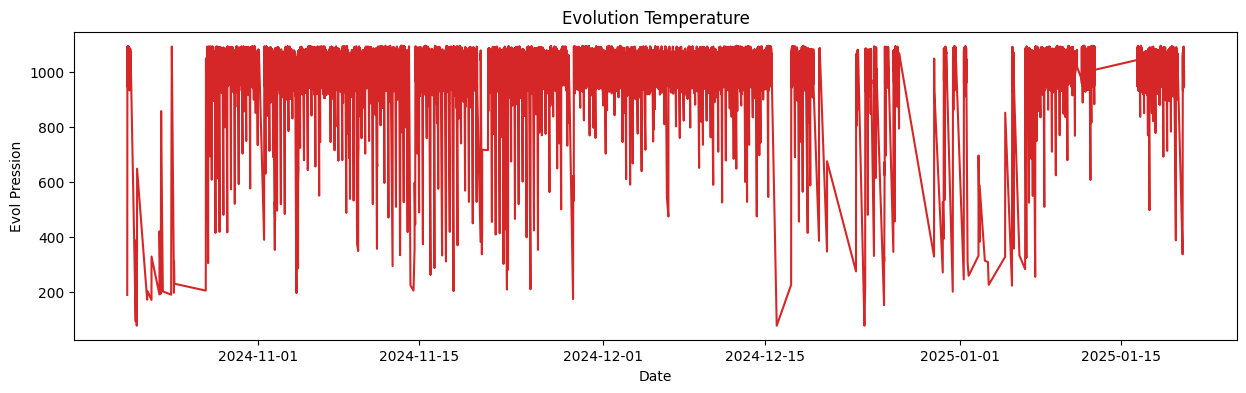

In [7]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Evol Pression', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    

plot_df(df, x=df['Heure'], y=df['Valeur maximale'], title='Evolution Temperature')

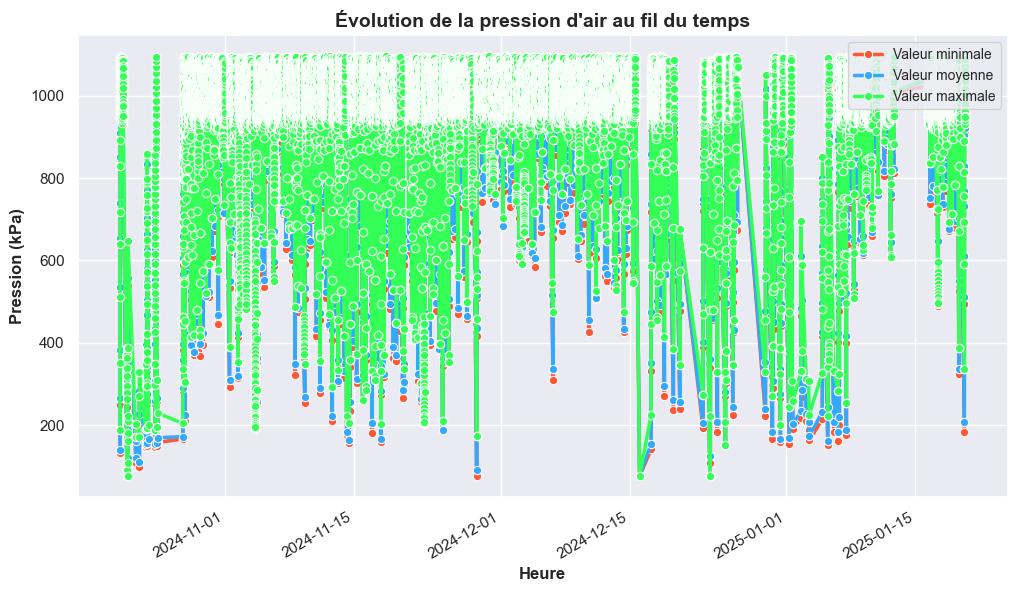

In [8]:
# Conversion de la colonne Heure en type datetime
df["Heure"] = pd.to_datetime(df["Heure"])

# Tri des données par ordre chronologique (au cas où)
df = df.sort_values(by="Heure")

# Style seaborn
sns.set_theme(style="darkgrid")

# Création de la figure
plt.figure(figsize=(12, 6))

# Tracé des courbes avec un style plus clair
sns.lineplot(x=df["Heure"], y=df["Valeur minimale"], marker="o", label="Valeur minimale", linewidth=2.5, color="#FF5733")
sns.lineplot(x=df["Heure"], y=df["Valeur moyenne"], marker="o", label="Valeur moyenne", linewidth=2.5, color="#33A8FF")
sns.lineplot(x=df["Heure"], y=df["Valeur maximale"], marker="o", label="Valeur maximale", linewidth=2.5, color="#33FF57")

# Mise en forme des axes
plt.xlabel("Heure", fontsize=12, fontweight="bold")
plt.ylabel("Pression (kPa)", fontsize=12, fontweight="bold")
plt.title("Évolution de la pression d'air au fil du temps", fontsize=14, fontweight="bold")

# Rotation des labels temporels pour une meilleure lisibilité
plt.xticks(rotation=30, ha="right")

# Ajout de la légende bien positionnée
plt.legend(loc="upper right", fontsize=10)

# Affichage du graphique
plt.show()



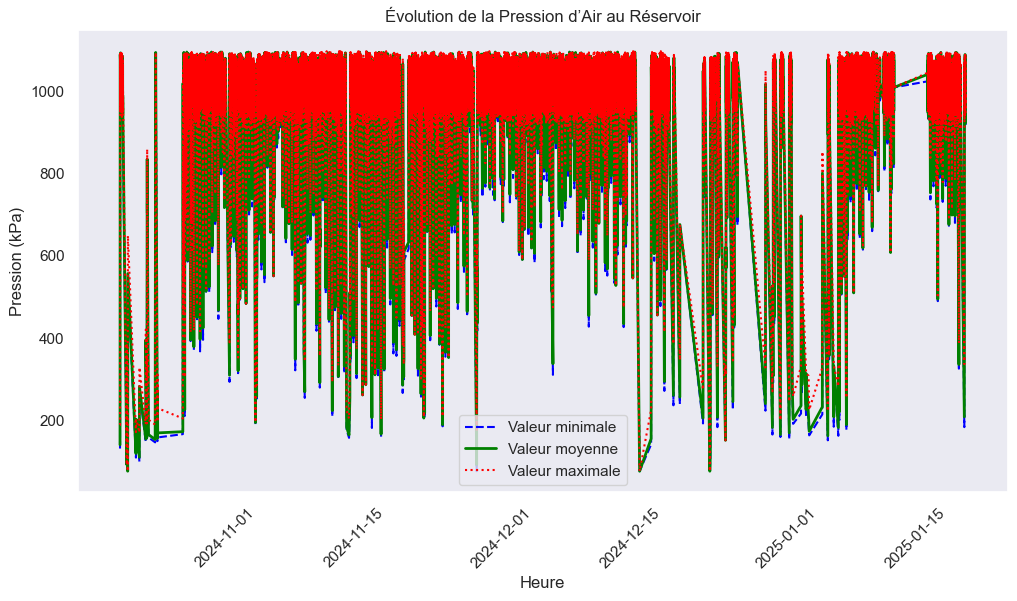

In [14]:
# Convertir la colonne "Heure" en datetime
df['Heure'] = pd.to_datetime(df['Heure'])

# Trier les données par heure croissante
df = df.sort_values(by="Heure")

# Tracer la série temporelle
plt.figure(figsize=(12, 6))
plt.plot(df["Heure"], df["Valeur minimale"], label="Valeur minimale", linestyle="dashed", color="blue")
plt.plot(df["Heure"], df["Valeur moyenne"], label="Valeur moyenne", linewidth=2, color="green")
plt.plot(df["Heure"], df["Valeur maximale"], label="Valeur maximale", linestyle="dotted", color="red")

# Ajout des légendes et titres
plt.xlabel("Heure")
plt.ylabel("Pression (kPa)")
plt.title("Évolution de la Pression d’Air au Réservoir")
plt.legend()
plt.xticks(rotation=45)
plt.grid()

# Affichage du graphique
plt.show()


       Valeur minimale  Valeur moyenne  Valeur maximale
count     29091.000000    29091.000000     29091.000000
mean        967.834932      982.045547       998.585404
std         105.243642      106.043802       103.915639
min          76.000000       76.000000        76.000000
25%         945.000000      959.000000       972.000000
50%         981.000000      995.000000      1011.000000
75%        1020.000000     1038.000000      1059.000000
max        1094.000000     1094.000000      1096.000000


C:\Users\hp\AppData\Local\Temp\ipykernel_22200\1944534406.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Moyenne_glissante"] = df_filtered["Valeur moyenne"].rolling(window=10, min_periods=1).mean()


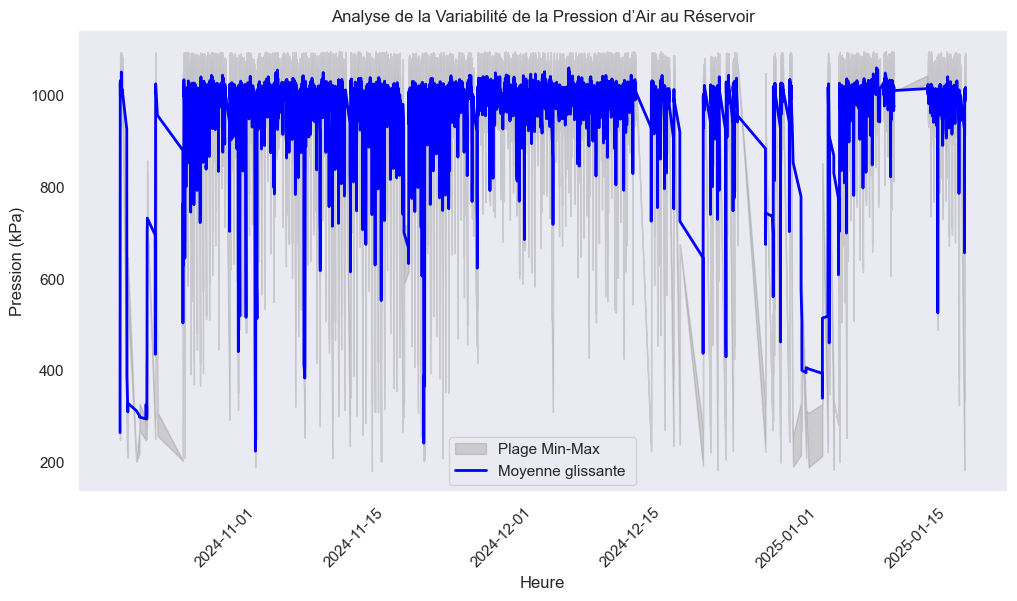

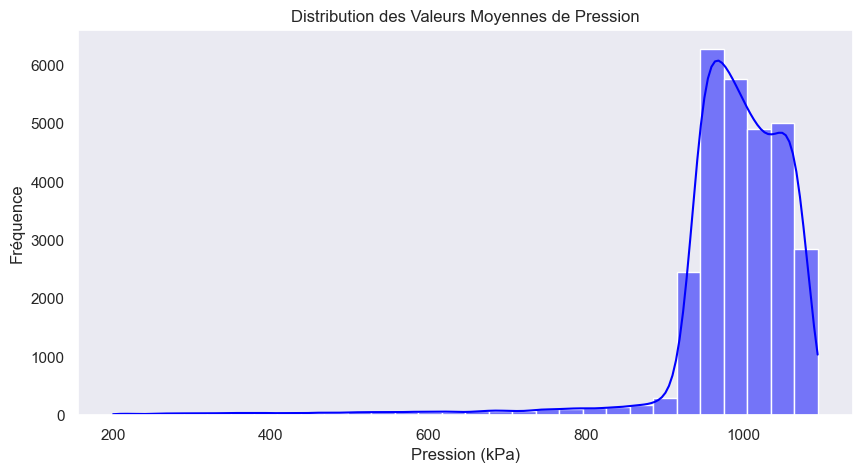

In [17]:
# Convertir la colonne "Heure" en datetime
df['Heure'] = pd.to_datetime(df['Heure'])

# Vérifier et convertir les colonnes de pression en numérique
cols_to_convert = ["Valeur minimale", "Valeur moyenne", "Valeur maximale"]
df[cols_to_convert] = df[cols_to_convert].apply(pd.to_numeric, errors="coerce")

# Supprimer les valeurs NaN restantes après conversion
df_cleaned = df.dropna(subset=cols_to_convert)

# Analyser les valeurs extrêmes
summary_stats = df_cleaned[cols_to_convert].describe()
print(summary_stats)

# Filtrer les valeurs suspectes en excluant les pressions < 200 kPa
df_filtered = df_cleaned[df_cleaned["Valeur moyenne"] >= 200]

# Calculer la moyenne glissante après nettoyage
df_filtered["Moyenne_glissante"] = df_filtered["Valeur moyenne"].rolling(window=10, min_periods=1).mean()

# Création de la figure pour visualiser la variabilité
plt.figure(figsize=(12, 6))

# Tracer les valeurs min et max comme une zone d'incertitude
plt.fill_between(df_filtered["Heure"], df_filtered["Valeur minimale"], df_filtered["Valeur maximale"], 
                 color="gray", alpha=0.3, label="Plage Min-Max")

# Tracer la moyenne glissante pour mieux voir la tendance
plt.plot(df_filtered["Heure"], df_filtered["Moyenne_glissante"], color="blue", linewidth=2, label="Moyenne glissante ")

# Ajout des légendes et titres
plt.xlabel("Heure")
plt.ylabel("Pression (kPa)")
plt.title("Analyse de la Variabilité de la Pression d’Air au Réservoir")
plt.legend()
plt.xticks(rotation=45)
plt.grid()

# Affichage du graphique
plt.show()

# Affichage de la distribution des valeurs sous forme d'histogramme
plt.figure(figsize=(10, 5))
sns.histplot(df_filtered["Valeur moyenne"], bins=30, kde=True, color="blue")
plt.xlabel("Pression (kPa)")
plt.ylabel("Fréquence")
plt.title("Distribution des Valeurs Moyennes de Pression")
plt.grid()

plt.show()


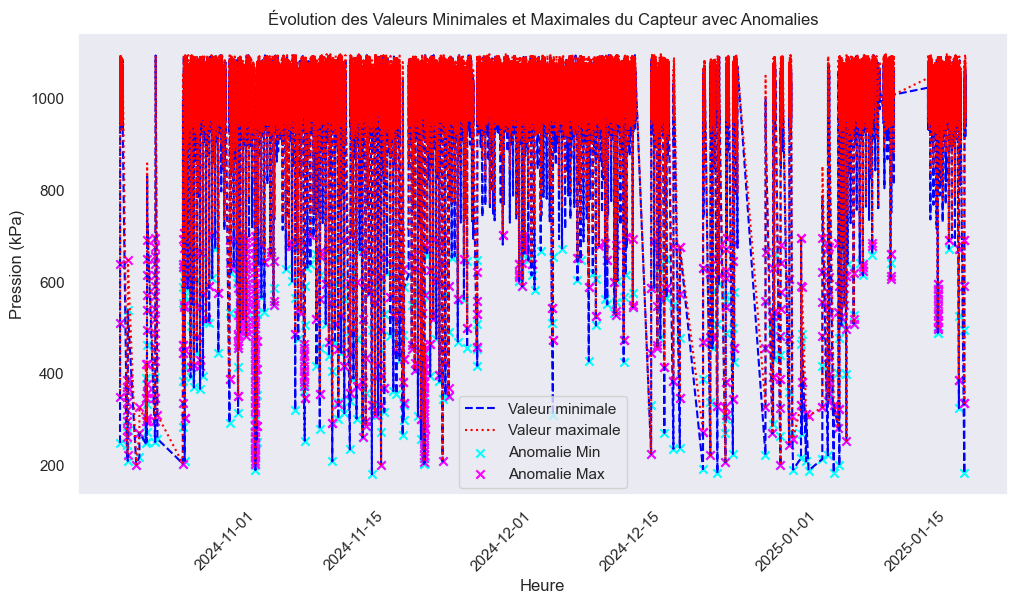

Seuils pour Valeur Minimale: [672.7181046220525, 1266.1028073492935]
Seuils pour Valeur Maximale: [707.7291368962294, 1292.589777554797]
Nombre d'anomalies sur Valeur Minimale: 713
Nombre d'anomalies sur Valeur Maximale: 674


In [22]:
# Convertir la colonne "Heure" en datetime
df['Heure'] = pd.to_datetime(df['Heure'])

# Vérifier et convertir les colonnes de pression en numérique
cols_to_convert = ["Valeur minimale", "Valeur moyenne", "Valeur maximale"]
df[cols_to_convert] = df[cols_to_convert].apply(pd.to_numeric, errors="coerce")

# Supprimer les valeurs NaN restantes après conversion
df_cleaned = df.dropna(subset=cols_to_convert)

# Filtrer les valeurs suspectes en excluant les pressions < 200 kPa
df_filtered = df_cleaned[df_cleaned["Valeur moyenne"] >= 200].copy()

# Ajout des colonnes pour segmentation temporelle
df_filtered["Jour"] = df_filtered["Heure"].dt.date
df_filtered["Semaine"] = df_filtered["Heure"].dt.isocalendar().week
df_filtered["Mois"] = df_filtered["Heure"].dt.month

# Détection des seuils d'anomalie basés sur les valeurs min et max
mean_min = df_filtered["Valeur minimale"].mean()
std_min = df_filtered["Valeur minimale"].std()
threshold_min_low = mean_min - 3 * std_min
threshold_min_high = mean_min + 3 * std_min

mean_max = df_filtered["Valeur maximale"].mean()
std_max = df_filtered["Valeur maximale"].std()
threshold_max_low = mean_max - 3 * std_max
threshold_max_high = mean_max + 3 * std_max

# Détection des anomalies
df_filtered["Anomalie_Min"] = (df_filtered["Valeur minimale"] < threshold_min_low) | (df_filtered["Valeur minimale"] > threshold_min_high)
df_filtered["Anomalie_Max"] = (df_filtered["Valeur maximale"] < threshold_max_low) | (df_filtered["Valeur maximale"] > threshold_max_high)

# Création de la visualisation des valeurs minimales et maximales au fil du temps
plt.figure(figsize=(12, 6))
plt.plot(df_filtered["Heure"], df_filtered["Valeur minimale"], label="Valeur minimale", linestyle="dashed", color="blue")
plt.plot(df_filtered["Heure"], df_filtered["Valeur maximale"], label="Valeur maximale", linestyle="dotted", color="red")
plt.scatter(df_filtered["Heure"][df_filtered["Anomalie_Min"]], df_filtered["Valeur minimale"][df_filtered["Anomalie_Min"]], color='cyan', label='Anomalie Min', marker='x')
plt.scatter(df_filtered["Heure"][df_filtered["Anomalie_Max"]], df_filtered["Valeur maximale"][df_filtered["Anomalie_Max"]], color='magenta', label='Anomalie Max', marker='x')

# Ajout des légendes et titres
plt.xlabel("Heure")
plt.ylabel("Pression (kPa)")
plt.title("Évolution des Valeurs Minimales et Maximales du Capteur avec Anomalies")
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()

# Statistiques des seuils d'anomalie
print(f"Seuils pour Valeur Minimale: [{threshold_min_low}, {threshold_min_high}]")
print(f"Seuils pour Valeur Maximale: [{threshold_max_low}, {threshold_max_high}]")
print(f"Nombre d'anomalies sur Valeur Minimale: {df_filtered['Anomalie_Min'].sum()}")
print(f"Nombre d'anomalies sur Valeur Maximale: {df_filtered['Anomalie_Max'].sum()}")


Anomalies détectées par Isolation Forest:
Anomalie_IF
 1    28746
-1      290
Name: count, dtype: int64


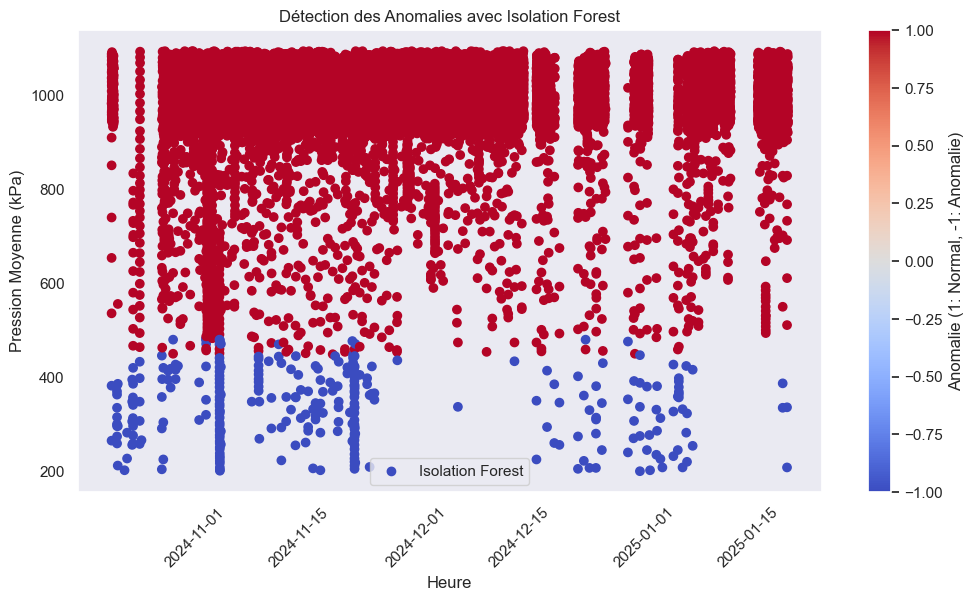

In [25]:
# Convertir la colonne "Heure" en datetime
df['Heure'] = pd.to_datetime(df['Heure'])

# Vérifier et convertir les colonnes de pression en numérique
cols_to_convert = ["Valeur minimale", "Valeur moyenne", "Valeur maximale"]
df[cols_to_convert] = df[cols_to_convert].apply(pd.to_numeric, errors="coerce")

# Supprimer les valeurs NaN restantes après conversion
df_cleaned = df.dropna(subset=cols_to_convert)

# Filtrer les valeurs suspectes en excluant les pressions < 200 kPa
df_filtered = df_cleaned[df_cleaned["Valeur moyenne"] >= 200].copy()

# Sélectionner uniquement les colonnes pertinentes pour l'analyse
df_anomaly = df_filtered[["Heure", "Valeur moyenne"]].copy()

# Appliquer Isolation Forest pour détecter les anomalies
iso_forest = IsolationForest(contamination=0.01, random_state=42)
df_anomaly["Anomalie_IF"] = iso_forest.fit_predict(df_anomaly[["Valeur moyenne"]])

# Afficher le nombre d'anomalies détectées par chaque méthode
anomalies_IF_count = df_anomaly["Anomalie_IF"].value_counts()

print("Anomalies détectées par Isolation Forest:")
print(anomalies_IF_count)

# Visualisation des anomalies détectées
plt.figure(figsize=(12, 6))
plt.scatter(df_anomaly["Heure"], df_anomaly["Valeur moyenne"], c=df_anomaly["Anomalie_IF"], cmap="coolwarm", label="Isolation Forest")
plt.xlabel("Heure")
plt.ylabel("Pression Moyenne (kPa)")
plt.title("Détection des Anomalies avec Isolation Forest")
plt.colorbar(label="Anomalie (1: Normal, -1: Anomalie)")
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()


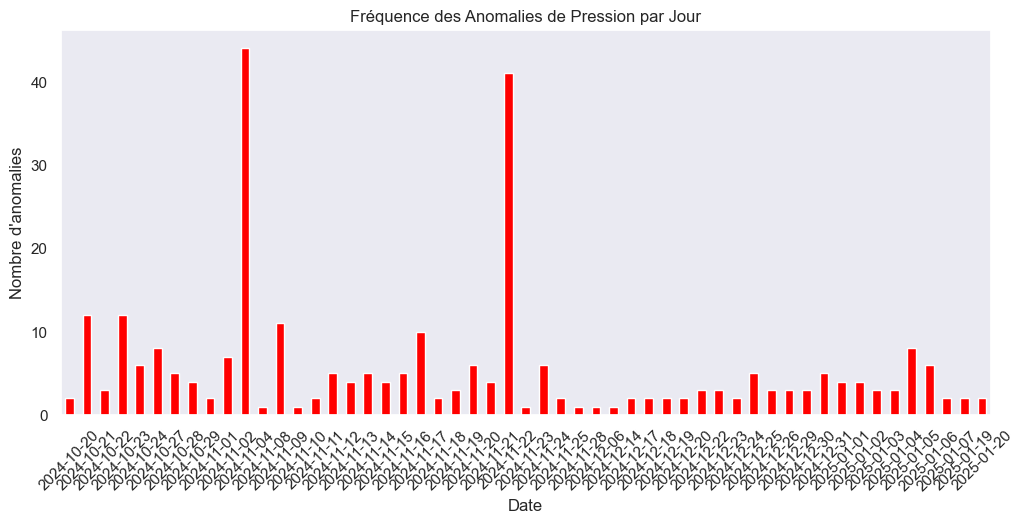

In [66]:
df_anomaly["Date"] = df_anomaly["Heure"].dt.date
anomalies_per_day = df_anomaly[df_anomaly["Anomalie_IF"] == -1].groupby("Date").size()

plt.figure(figsize=(12, 5))
anomalies_per_day.plot(kind="bar", color="red")
plt.xlabel("Date")
plt.ylabel("Nombre d'anomalies")
plt.title("Fréquence des Anomalies de Pression par Jour")
plt.xticks(rotation=45)
plt.grid()
plt.show()


# Tempé échapp G 538 D 540
 

In [3]:
chemin_fichier = r"C:\Users\hp\Desktop\PFE UM6P\Data\Paramètres Diagnostique_Globale2.xlsx" 
nom_feuille = "Tempé échapp G 538 D 540"
df = pd.read_excel(chemin_fichier, sheet_name=nom_feuille)

In [4]:
df.head()

Engin                    Paramètres Diagnostic  Code               Heure  \
0  994 F2   CH994.P1.Température échappement Droit   540 2025-01-20 10:32:04   
1  994 F2  CH994.P1.Température échappement gauche   538 2025-01-20 10:32:04   
2  994 F2   CH994.P1.Température échappement Droit   540 2025-01-20 10:30:04   
3  994 F2  CH994.P1.Température échappement gauche   538 2025-01-20 10:30:04   
4  994 F2   CH994.P1.Température échappement Droit   540 2025-01-20 10:28:03   

   Valeur minimale  Valeur moyenne  Valeur maximale Unité de mesure  \
0              205             216              240              °C   
1              208             220              245              °C   
2              240             285              422              °C   
3              245             289              422              °C   
4              422             426              442              °C   

  Fonctionnement du capteur  
0                       Oui  
1                       Oui  
2                       Oui  
3                       Oui  
4                       Oui

        Engin                    Paramètres Diagnostic  Code  \
60677  994 F2  CH994.P1.Température échappement gauche   538   
60676  994 F2   CH994.P1.Température échappement Droit   540   
60674  994 F2   CH994.P1.Température échappement Droit   540   
60675  994 F2  CH994.P1.Température échappement gauche   538   
60672  994 F2   CH994.P1.Température échappement Droit   540   

                    Heure  Valeur minimale  Valeur moyenne  Valeur maximale  \
60677 2024-10-20 15:02:32              135             135              135   
60676 2024-10-20 15:02:32              128             128              128   
60674 2024-10-20 15:04:33              128             147              166   
60675 2024-10-20 15:04:33              135             156              177   
60672 2024-10-20 15:06:33              166             166              167   

      Unité de mesure Fonctionnement du capteur  
60677              °C                       Oui  
60676              °C                   

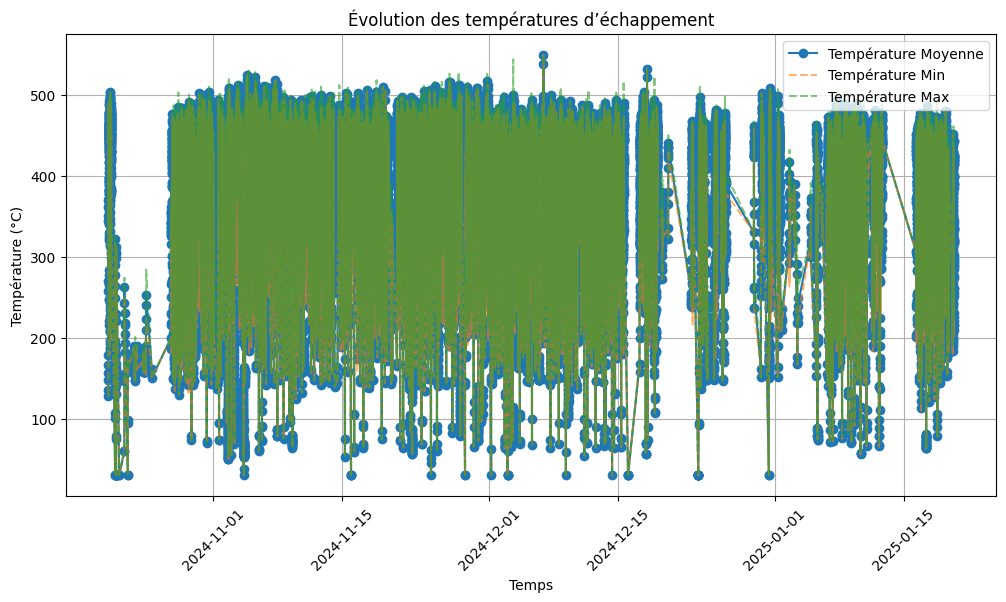

In [7]:
# Convertir la colonne Heure en datetime
df["Heure"] = pd.to_datetime(df["Heure"], format="%d.%m.%Y %H:%M:%S")

# Trier les données par heure
df = df.sort_values(by="Heure")

# Afficher un aperçu
print(df.head())

# Visualiser l'évolution des températures
plt.figure(figsize=(12, 6))

# Tracer les températures
plt.plot(df["Heure"], df["Valeur moyenne"], label="Température Moyenne", marker="o")
plt.plot(df["Heure"], df["Valeur minimale"], linestyle="dashed", label="Température Min", alpha=0.6)
plt.plot(df["Heure"], df["Valeur maximale"], linestyle="dashed", label="Température Max", alpha=0.6)

plt.xlabel("Temps")
plt.ylabel("Température (°C)")
plt.title("Évolution des températures d’échappement")
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()


🔥 ALERTES : Températures au-delà de 800°C 🔥
Empty DataFrame
Columns: [Heure, Valeur maximale]
Index: []


c:\Users\hp\.conda\envs\UM6P_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\hp\.conda\envs\UM6P_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


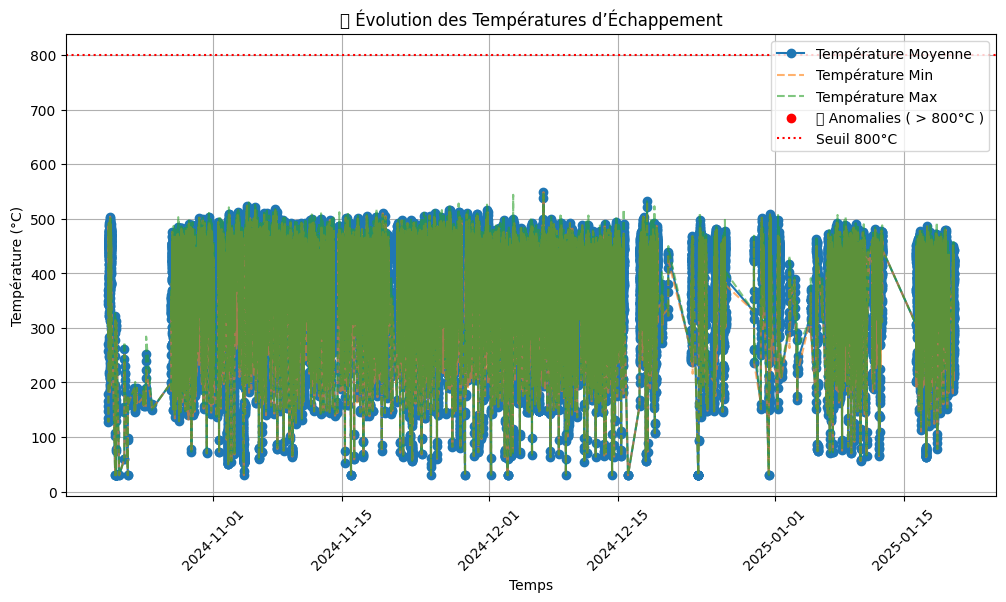

In [8]:
# 🔹 CONVERSION DE LA DATE
df["Heure"] = pd.to_datetime(df["Heure"], format="%d.%m.%Y %H:%M:%S")

# 🔹 TRIER LES DONNÉES PAR HEURE
df = df.sort_values(by="Heure")

# 🔹 SEUIL CRITIQUE
SEUIL_CRITIQUE = 800

# 🔹 DÉTECTION DES ANOMALIES (Valeurs dépassant 800°C)
df["Anomalie"] = df["Valeur maximale"] > SEUIL_CRITIQUE

# 🔹 AFFICHAGE DES VALEURS QUI DÉPASSENT 800°C
anomalies = df[df["Anomalie"]]
print("🔥 ALERTES : Températures au-delà de 800°C 🔥")
print(anomalies[["Heure", "Valeur maximale"]])

# 🔹 VISUALISATION DES TEMPÉRATURES
plt.figure(figsize=(12, 6))

plt.plot(df["Heure"], df["Valeur moyenne"], label="Température Moyenne", marker="o")
plt.plot(df["Heure"], df["Valeur minimale"], linestyle="dashed", label="Température Min", alpha=0.6)
plt.plot(df["Heure"], df["Valeur maximale"], linestyle="dashed", label="Température Max", alpha=0.6)

# 🔹 MARQUAGE DES ANOMALIES SUR LE GRAPHIQUE
plt.scatter(anomalies["Heure"], anomalies["Valeur maximale"], color="red", label="🚨 Anomalies ( > 800°C )", zorder=3)

# 🔹 AJOUT DU SEUIL CRITIQUE
plt.axhline(y=SEUIL_CRITIQUE, color="red", linestyle="dotted", label="Seuil 800°C")

# 🔹 CUSTOMISATION DU GRAPHIQUE
plt.xlabel("Temps")
plt.ylabel("Température (°C)")
plt.title("📊 Évolution des Températures d’Échappement")
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_2564\449837155.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_class["Anomalie"] = iso_forest.fit_predict(X)
C:\Users\hp\AppData\Local\Temp\ipykernel_2564\449837155.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_class["Anomalie"] = df_class["Anomalie"] == -1
C:\Users\hp\AppData\Local\Temp\ipykernel_2564\449837155.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

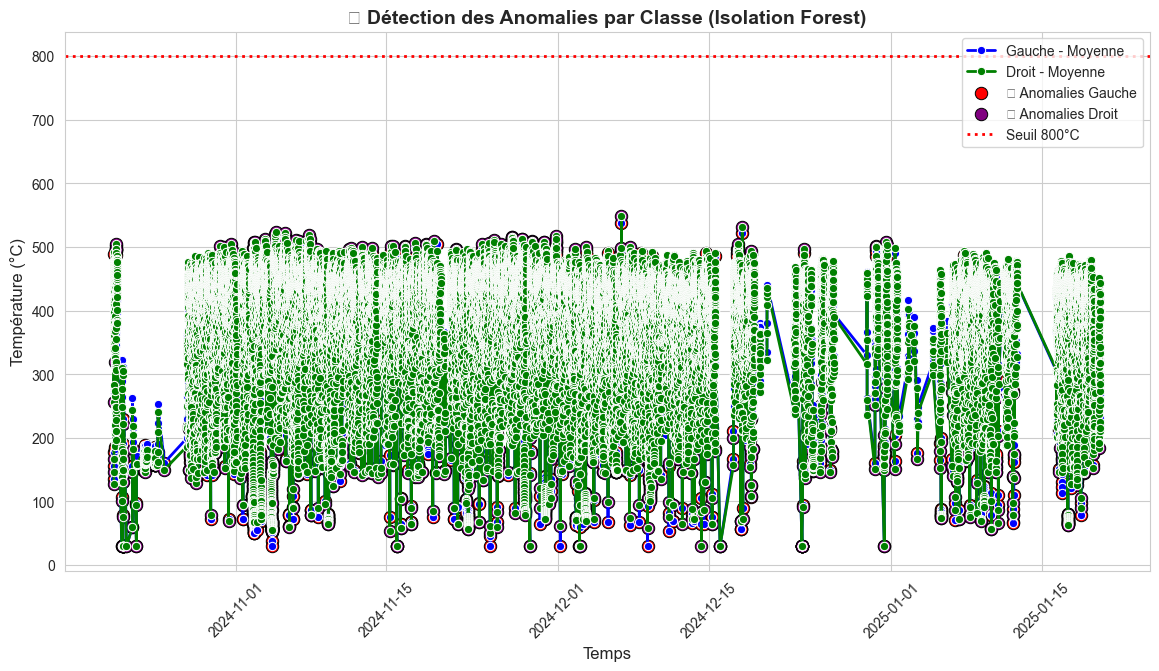

In [20]:
# 🔹 CONVERSION DE LA COLONNE "Heure" EN FORMAT DATETIME
df["Heure"] = pd.to_datetime(df["Heure"], format="%d.%m.%Y %H:%M:%S")

# 🔹 TRIER LES DONNÉES PAR HEURE
df = df.sort_values(by="Heure")

# 🔹 CLASSIFICATION DES PARAMÈTRES DIAGNOSTIC
df["Classe"] = df["Paramètres Diagnostic"].apply(
    lambda x: "Échappement Gauche" if "gauche" in x.lower() else 
              "Échappement Droit" if "droit" in x.lower() else "Autre"
)

# 🔹 FILTRER SEULEMENT LES DEUX CLASSES (Supprimer "Autre" s'il y a d'autres valeurs)
df = df[df["Classe"] != "Autre"]

# 🔹 SUPPRIMER LES VALEURS MANQUANTES
df = df.dropna(subset=["Valeur moyenne", "Valeur minimale", "Valeur maximale"])

# 🔹 FONCTION POUR DÉTECTER LES ANOMALIES PAR CLASSE
def detect_anomalies(df_class):
    X = df_class[["Valeur moyenne", "Valeur minimale", "Valeur maximale"]]

    # Entraînement du modèle Isolation Forest
    iso_forest = IsolationForest(contamination=0.05, random_state=42)
    df_class["Anomalie"] = iso_forest.fit_predict(X)

    # Convertir -1 (anomalie) en True et 1 (normal) en False
    df_class["Anomalie"] = df_class["Anomalie"] == -1
    return df_class

# 🔹 DÉTECTION DES ANOMALIES POUR CHAQUE CLASSE
df_gauche = detect_anomalies(df[df["Classe"] == "Échappement Gauche"])
df_droit = detect_anomalies(df[df["Classe"] == "Échappement Droit"])

# 🔹 CRÉATION DES GRAPHIQUES AVANCÉS
plt.figure(figsize=(14, 7))
sns.set_style("whitegrid")

# 🔹 TRACER LES SÉRIES TEMPORELLES POUR CHAQUE CLASSE
sns.lineplot(data=df_gauche, x="Heure", y="Valeur moyenne", label="Gauche - Moyenne", marker="o", linewidth=2, color="blue")
sns.lineplot(data=df_droit, x="Heure", y="Valeur moyenne", label="Droit - Moyenne", marker="o", linewidth=2, color="green")

# 🔹 MARQUER LES ANOMALIES DÉTECTÉES
sns.scatterplot(data=df_gauche[df_gauche["Anomalie"]], x="Heure", y="Valeur moyenne", color="red", label="🚨 Anomalies Gauche", s=80, edgecolor="black")
sns.scatterplot(data=df_droit[df_droit["Anomalie"]], x="Heure", y="Valeur moyenne", color="purple", label="🚨 Anomalies Droit", s=80, edgecolor="black")

# 🔹 SEUIL FIXE DE 800°C EN LIGNE POINTILLÉE
plt.axhline(y=800, color="red", linestyle="dotted", linewidth=2, label="Seuil 800°C")

# 🔹 CUSTOMISATION DU GRAPHIQUE
plt.xlabel("Temps", fontsize=12)
plt.ylabel("Température (°C)", fontsize=12)
plt.title("📊 Détection des Anomalies par Classe (Isolation Forest)", fontsize=14, fontweight="bold")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


In [6]:
pip install pyod

  Using cached pyod-2.0.3.tar.gz (169 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ------- -------------------------------- 0.5/2.8 MB 1.7 MB/s eta 0:00:02
   ----------- ---------------------------- 0.8/2.8 MB 1.7 MB/s eta 0:00:02
   -------------- ------------------------- 1.0/2.8 MB 1.7 MB/s eta 0:00:02
   ------------------ --------------------- 1.3/2.8 MB 1.6 MB/s eta 0:00:01
   ------------------------- -------------- 1.8/2.8 MB 1.7 MB/s eta 0:00:01
   ----------------------------- ---------- 2.1/2.8 MB 1.7 MB/s eta 0:00:01
   --------------------------------- ------ 2.4/2.8 MB 1.6 MB/s eta 0:00:01
   ---------------------------------------- 2.8/2.8 MB 1.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/30.3 MB ? eta -:--:--
   -------------------------------------

c:\Users\hp\.conda\envs\UM6P_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


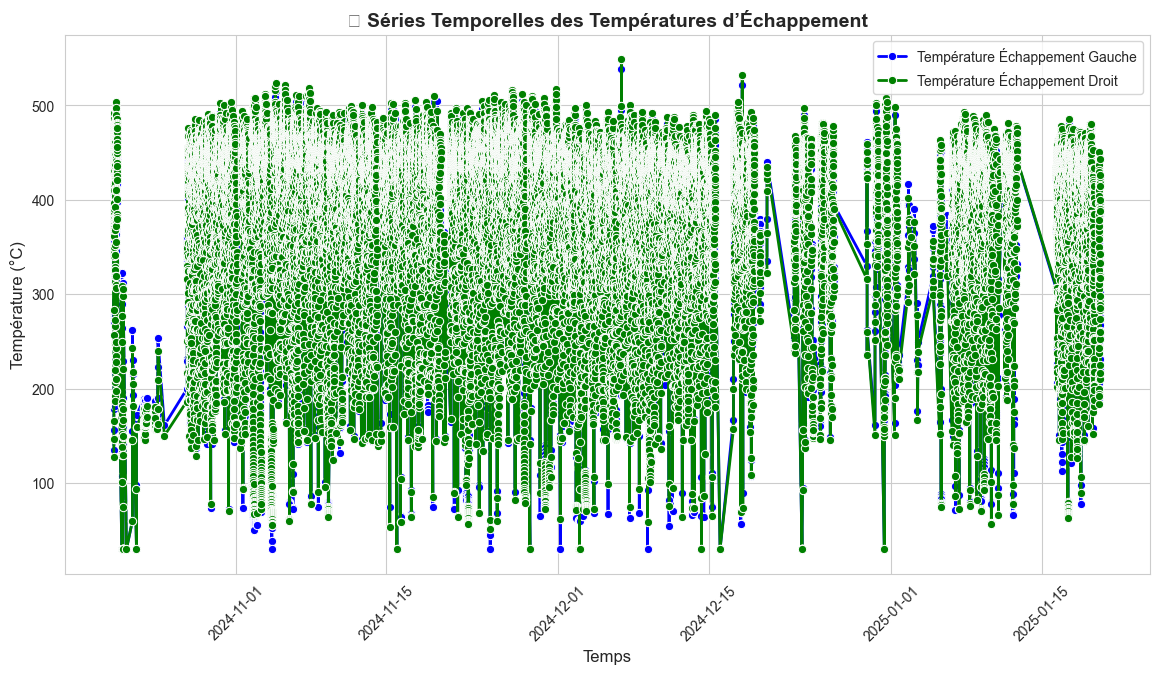

In [5]:
# 🔹 CONVERSION DE LA COLONNE "Heure" EN FORMAT DATETIME
df["Heure"] = pd.to_datetime(df["Heure"], format="%d.%m.%Y %H:%M:%S")

# 🔹 CLASSIFICATION DES PARAMÈTRES DIAGNOSTIC
df["Classe"] = df["Paramètres Diagnostic"].apply(
    lambda x: "Échappement Gauche" if "gauche" in x.lower() else 
              "Échappement Droit" if "droit" in x.lower() else "Autre"
)

# 🔹 FILTRER SEULEMENT LES DEUX CLASSES (Supprime "Autre" si besoin)
df = df[df["Classe"] != "Autre"]

# 🔹 TRIER LES DONNÉES PAR HEURE
df = df.sort_values(by="Heure")

# 🔹 CRÉATION DU GRAPHIQUE
plt.figure(figsize=(14, 7))
sns.set_style("whitegrid")

# 🔹 TRACER LES SÉRIES TEMPORELLES POUR CHAQUE CLASSE
sns.lineplot(data=df[df["Classe"] == "Échappement Gauche"], x="Heure", y="Valeur moyenne",
             label="Température Échappement Gauche", marker="o", linewidth=2, color="blue")

sns.lineplot(data=df[df["Classe"] == "Échappement Droit"], x="Heure", y="Valeur moyenne",
             label="Température Échappement Droit", marker="o", linewidth=2, color="green")

# 🔹 CUSTOMISATION DU GRAPHIQUE
plt.xlabel("Temps", fontsize=12)
plt.ylabel("Température (°C)", fontsize=12)
plt.title("📊 Séries Temporelles des Températures d’Échappement", fontsize=14, fontweight="bold")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


c:\Users\hp\.conda\envs\UM6P_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


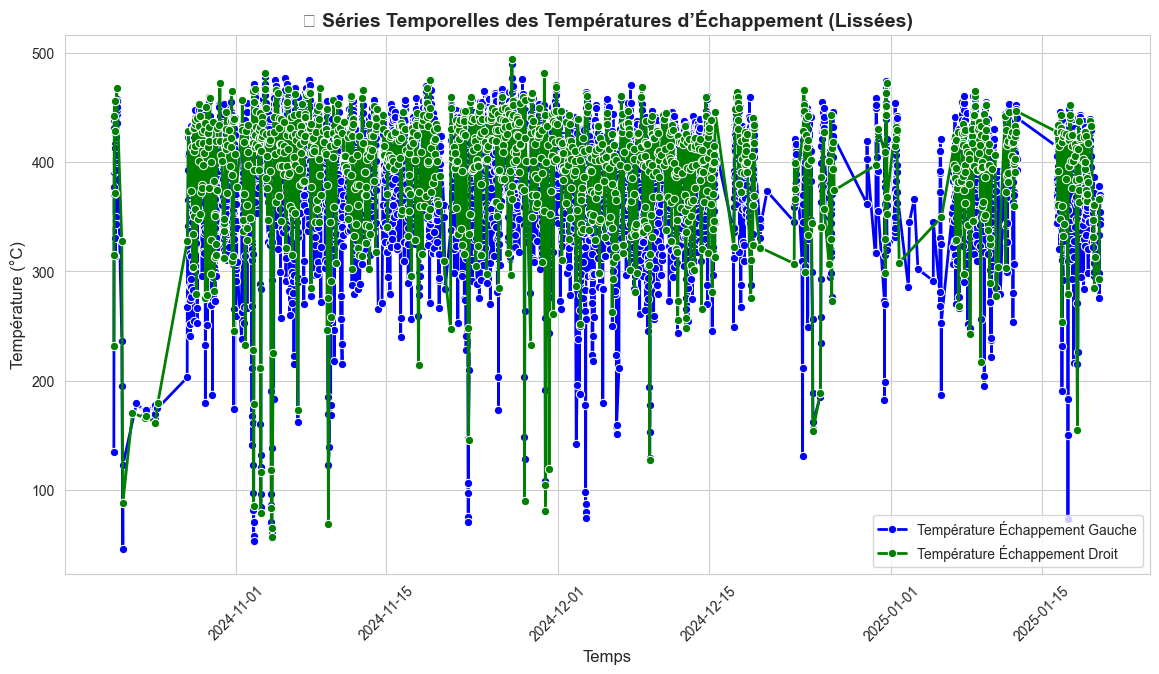

In [6]:
# 🔹 CONVERSION DE LA COLONNE "Heure" EN FORMAT DATETIME
df["Heure"] = pd.to_datetime(df["Heure"], format="%d.%m.%Y %H:%M:%S")

# 🔹 CLASSIFICATION DES PARAMÈTRES DIAGNOSTIC
df["Classe"] = df["Paramètres Diagnostic"].apply(
    lambda x: "Échappement Gauche" if "gauche" in x.lower() else 
              "Échappement Droit" if "droit" in x.lower() else "Autre"
)

# 🔹 FILTRER SEULEMENT LES DEUX CLASSES
df = df[df["Classe"] != "Autre"]

# 🔹 APPLIQUER UNE MOYENNE GLISSANTE POUR LISSEMENT (Fenêtre de 10 points)
df["Valeur lissée"] = df.groupby("Classe")["Valeur moyenne"].transform(lambda x: x.rolling(10, min_periods=1).mean())

# 🔹 ÉCHANTILLONNER POUR RÉDUIRE LE NOMBRE DE POINTS (Garder 1 point sur 10)
df = df.iloc[::10, :]

# 🔹 TRIER LES DONNÉES PAR HEURE
df = df.sort_values(by="Heure")

# 🔹 CRÉATION DU GRAPHIQUE LISSE
plt.figure(figsize=(14, 7))
sns.set_style("whitegrid")

# 🔹 TRACER LES SÉRIES TEMPORELLES LISSEES
sns.lineplot(data=df[df["Classe"] == "Échappement Gauche"], x="Heure", y="Valeur lissée",
             label="Température Échappement Gauche", marker="o", linewidth=2, color="blue")

sns.lineplot(data=df[df["Classe"] == "Échappement Droit"], x="Heure", y="Valeur lissée",
             label="Température Échappement Droit", marker="o", linewidth=2, color="green")

# 🔹 CUSTOMISATION DU GRAPHIQUE
plt.xlabel("Temps", fontsize=12)
plt.ylabel("Température (°C)", fontsize=12)
plt.title("📊 Séries Temporelles des Températures d’Échappement (Lissées)", fontsize=14, fontweight="bold")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


c:\Users\hp\.conda\envs\UM6P_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


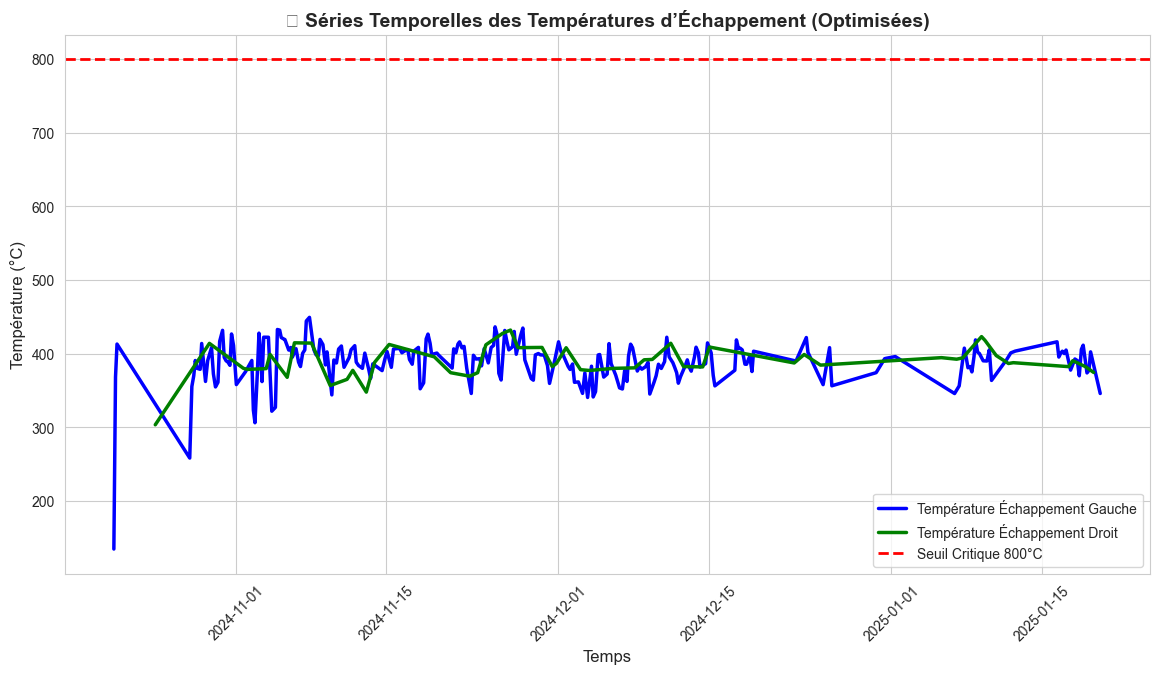

In [7]:
# 🔹 CONVERSION DE LA COLONNE "Heure" EN FORMAT DATETIME
df["Heure"] = pd.to_datetime(df["Heure"], format="%d.%m.%Y %H:%M:%S")

# 🔹 CLASSIFICATION DES PARAMÈTRES DIAGNOSTIC
df["Classe"] = df["Paramètres Diagnostic"].apply(
    lambda x: "Échappement Gauche" if "gauche" in x.lower() else 
              "Échappement Droit" if "droit" in x.lower() else "Autre"
)

# 🔹 FILTRER SEULEMENT LES DEUX CLASSES
df = df[df["Classe"] != "Autre"]

# 🔹 SUPPRESSION DES VALEURS ABERRANTES (Température réaliste : 50-800°C)
df = df[(df["Valeur moyenne"] > 50) & (df["Valeur moyenne"] < 800)]

# 🔹 LISSEMENT DES DONNÉES AVEC UNE MOYENNE GLISSANTE (rolling mean)
df["Valeur lissée"] = df.groupby("Classe")["Valeur moyenne"].transform(lambda x: x.rolling(30, min_periods=1).mean())

# 🔹 ÉCHANTILLONNER POUR RÉDUIRE LE NOMBRE DE POINTS (Garder 1 point sur 20)
df = df.iloc[::20, :]

# 🔹 TRIER LES DONNÉES PAR HEURE
df = df.sort_values(by="Heure")

# 🔹 CRÉATION DU GRAPHIQUE AMÉLIORÉ
plt.figure(figsize=(14, 7))
sns.set_style("whitegrid")

# 🔹 TRACER LES SÉRIES TEMPORELLES LISSEES
sns.lineplot(data=df[df["Classe"] == "Échappement Gauche"], x="Heure", y="Valeur lissée",
             label="Température Échappement Gauche", linewidth=2.5, color="blue")

sns.lineplot(data=df[df["Classe"] == "Échappement Droit"], x="Heure", y="Valeur lissée",
             label="Température Échappement Droit", linewidth=2.5, color="green")

# 🔹 AJOUT DU SEUIL CRITIQUE DE 800°C
plt.axhline(y=800, color="red", linestyle="dashed", linewidth=2, label="Seuil Critique 800°C")

# 🔹 CUSTOMISATION DU GRAPHIQUE
plt.xlabel("Temps", fontsize=12)
plt.ylabel("Température (°C)", fontsize=12)
plt.title("📊 Séries Temporelles des Températures d’Échappement (Optimisées)", fontsize=14, fontweight="bold")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# 🔹 AFFICHER LE GRAPHIQUE
plt.show()
